In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data Loading
ratings = pd.read_csv('../res/ratings.csv')
movies = pd.read_csv('../res/movies.csv')

In [28]:
print(50 * "=")
print("Movies Data Preview")
print(50 * "=")

print("Shape:", movies.shape)
print("\nData types:\n", movies.dtypes)
print("\nMissing values:\n", movies.isna().sum())

# Numeric summary
print("\nNumeric summary:\n", movies.describe())

# Categorical summary (safe version)
categorical_cols = movies.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    print("\nCategorical summary:\n", movies[categorical_cols].describe())
else:
    print("\nNo categorical columns found.")


# Show first and last rows
display(movies.head(), movies.tail())

Movies Data Preview
Shape: (9742, 3)

Data types:
 movieId     int64
title      object
genres     object
dtype: object

Missing values:
 movieId    0
title      0
genres     0
dtype: int64

Numeric summary:
              movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

Categorical summary:
                   title genres
count              9742   9742
unique             9737    951
top     Saturn 3 (1980)  Drama
freq                  2   1053


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [30]:
print(50 * "=")
print("Ratings Data Preview")
print(50 * "=")

print("Shape:", ratings.shape)
print("\nData types:\n", ratings.dtypes)
print("\nMissing values:\n", ratings.isna().sum())

# Numeric summary
print("\nNumeric summary:\n", ratings.describe())

# Categorical summary (safe version)
categorical_cols = ratings.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    print("\nCategorical summary:\n", ratings[categorical_cols].describe())
else:
    print("\nNo categorical columns found.")


# Show first and last rows
display(ratings.head(), ratings.tail())

Ratings Data Preview
Shape: (100836, 4)

Data types:
 userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Missing values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Numeric summary:
               userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

No categorical columns found.


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [31]:
# For Title "Toy Story (1995)"
title = movies[movies['movieId']==1]['title'].values[0]
num_of_ratings = sum(ratings['movieId']==1)
mean_rating = ratings[ratings['movieId']==1]['rating'].mean()

print(f"Title: {title}")
print(f"Total Ratings: {num_of_ratings}")
print(f"Average Rating: {mean_rating}")

Title: Toy Story (1995)
Total Ratings: 215
Average Rating: 3.9209302325581397


<Axes: xlabel='rating', ylabel='count'>

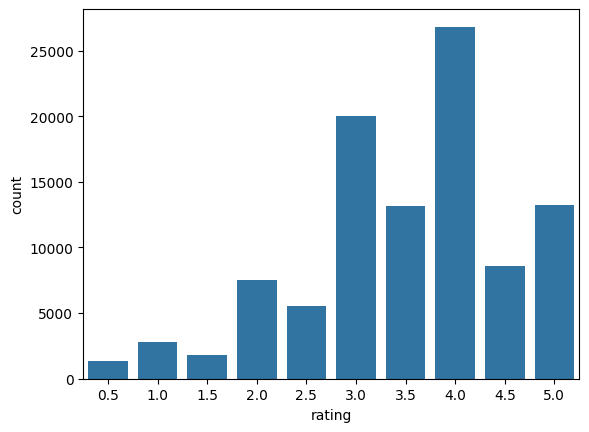

In [32]:
# Visualizations
sns.countplot(x='rating',data=ratings)

In [33]:
movies['title'].value_counts().head(10)

title
Saturn 3 (1980)                           2
Confessions of a Dangerous Mind (2002)    2
Emma (1996)                               2
Eros (2004)                               2
War of the Worlds (2005)                  2
Sabrina (1995)                            1
Tom and Huck (1995)                       1
Sudden Death (1995)                       1
Solo: A Star Wars Story (2018)            1
Leaving Las Vegas (1995)                  1
Name: count, dtype: int64

In [34]:
data = pd.merge(ratings,movies,on='movieId')
display(data)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [40]:
# Movie rating statistics
stats = pd.DataFrame(data.groupby('title')['rating'].mean(),columns = ['rating'])
stats['count'] = data.groupby('title')['rating'].count()
stats

,rating,count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


<Axes: xlabel='rating', ylabel='count'>

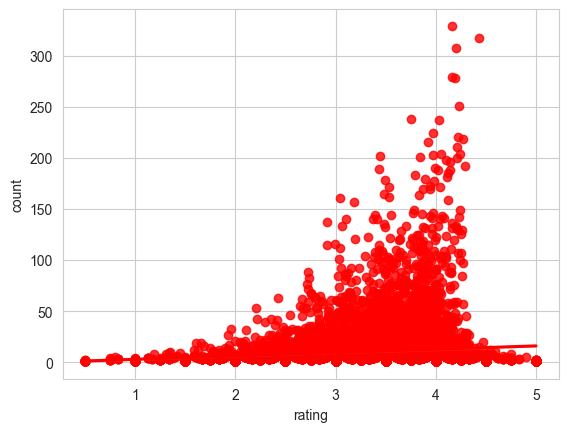

In [41]:
sns.set_style('whitegrid')
sns.regplot(x='rating',y='count',data = stats,color='r')

<Axes: xlabel='rating', ylabel='count'>

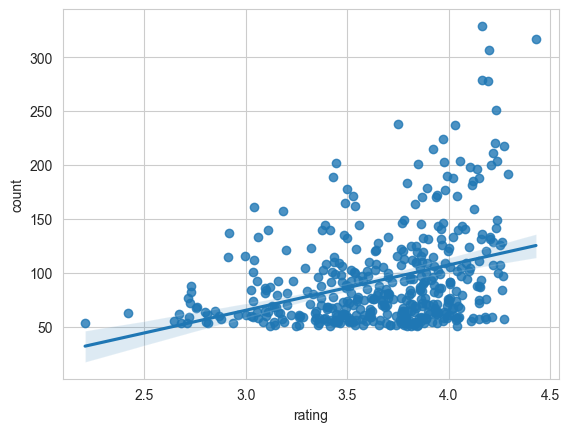

In [42]:
sns.regplot(x='rating',y='count',data = stats[stats['count']>50])

In [44]:
stats.sort_values(by='count',ascending=False).head(10)

,rating,count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224
